<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab07_interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio metodos computacionales, 
# Interpolacion





# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.











Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import newton
from scipy.interpolate import lagrange

In [ ]:
vo = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = vo/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

def pos_x(t, vo, theta0, u, alpha, b, g  ):
  t1 = u*np.cos(alpha)*t  
  t2 = 1./b*(vo*np.cos(theta0)-u*np.cos(alpha))  
  t3 = (1-np.exp(-b*t))
  return t1 + t2 * t3


def pos_y(t, vo, theta0, u, alpha, b, g  ):
  t1 = (g/b + vo*np.sin(theta0) - u* np.sin(alpha) )
  t2 = (1-np.exp(-b*t)) 
  t3 = (g/b - u*np.sin(alpha))*t 
  return 1./b * t1 * t2 - t3

In [ ]:
t = np.linspace(0, 8.5, 100)
Params = (vo, theta, u, alpha, b , g)  #Parametros en tupla.
x = pos_x(t, *Params)
y = pos_y(t, *Params)

In [ ]:
dicc = {"x":x,"y":y ,"t":t}
df = pd.DataFrame(dicc)

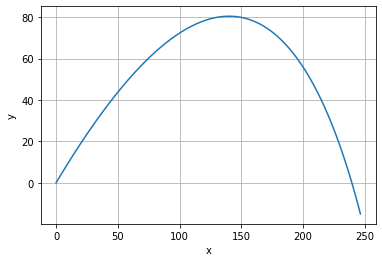

In [ ]:
plt.plot(df.x, df.y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

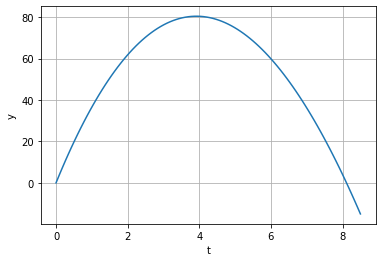

In [ ]:
plt.plot(df.t, df.y)
plt.xlabel("t")
plt.ylabel("y")
plt.grid()

In [ ]:
tv = newton(pos_y, 6.5, args=Params)
tv

8.111627022095584

In [ ]:
pos_x(tv, *Params)

239.60614945520726

# Generalizacion

In [ ]:
theta = np.deg2rad(np.arange(5, 80, 5)) #Angulo de lanzamiento
theta

array([0.08726646, 0.17453293, 0.26179939, 0.34906585, 0.43633231,
       0.52359878, 0.61086524, 0.6981317 , 0.78539816, 0.87266463,
       0.95993109, 1.04719755, 1.13446401, 1.22173048, 1.30899694])

In [ ]:
Rmax = np.zeros(len(theta))
for i, te in enumerate(theta):
  Params = (vo, te, u, alpha, b , g)  #Parametros en tupla.
  tv = newton(pos_y, 6.5, args = Params) #tiempo de vuelo total
  Rmax[i] = pos_x(tv, *Params)
  #print(tv,pos_x(tv, *Params))

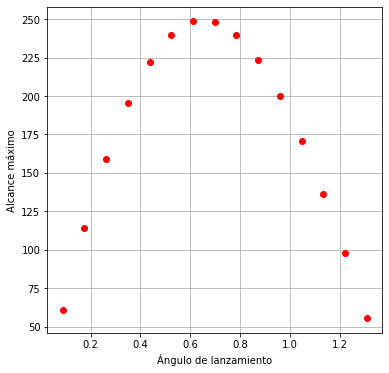

In [ ]:
# Alcance maximo como funcion de theta
plt.figure(figsize=(6,6))
plt.plot(theta, Rmax,"ro" )
plt.ylabel("Alcance máximo")
plt.xlabel("Ángulo de lanzamiento")
plt.grid()

## Realice una interpolacion de R como función de theta.

In [ ]:
#La interpolación se llevará a cabo mediante los 3 métodos vistos en clase 

import matplotlib.pylab as plt
import scipy.optimize as opt
import scipy as sc
import matplotlib.pylab as plt 
import numpy as np
from scipy import interpolate

In [ ]:
f = interpolate.interp1d(theta, Rmax)

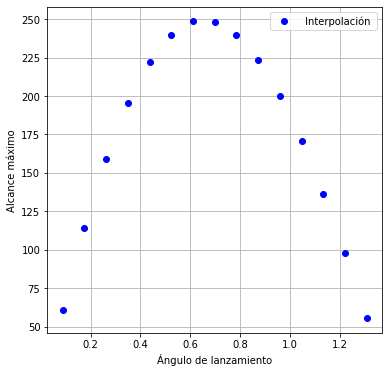

In [ ]:
# Alcance maximo como funcion de theta
plt.figure(figsize=(6,6))
plt.plot(theta, f(theta),"bo" ,label =' Interpolación ')
plt.ylabel("Alcance máximo")
plt.xlabel("Ángulo de lanzamiento")
plt.grid()
plt.legend()

In [ ]:
#Aplicando interpolacion por Lagrange
from scipy.interpolate import lagrange

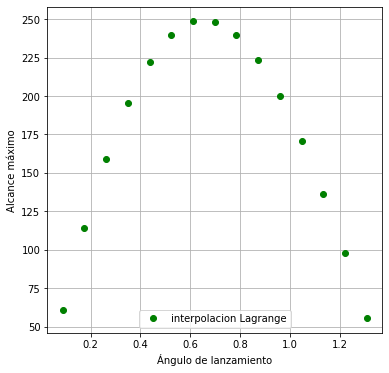

In [ ]:
L=lagrange(theta, Rmax)
# Alcance maximo como funcion de theta
plt.figure(figsize=(6,6))
plt.plot(theta, L(theta),"go" ,label ='interpolacion Lagrange')
plt.ylabel("Alcance máximo")
plt.xlabel("Ángulo de lanzamiento")
plt.grid()
plt.legend()

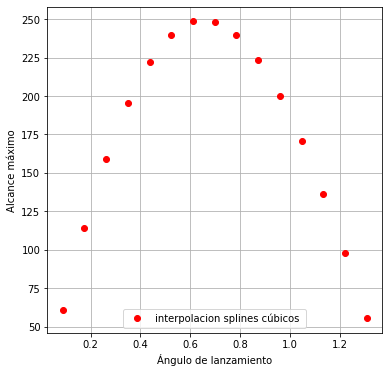

In [ ]:
#Interpolando mediante splines cúblicos 
from scipy.interpolate import  CubicSpline
Int_spline=CubicSpline(theta,Rmax)
# Alcance maximo como funcion de theta
plt.figure(figsize=(6,6))
plt.plot(theta,Int_spline(theta),"ro" ,label='interpolacion splines cúbicos ')
plt.ylabel("Alcance máximo")
plt.xlabel("Ángulo de lanzamiento")
plt.grid()
plt.legend()


# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


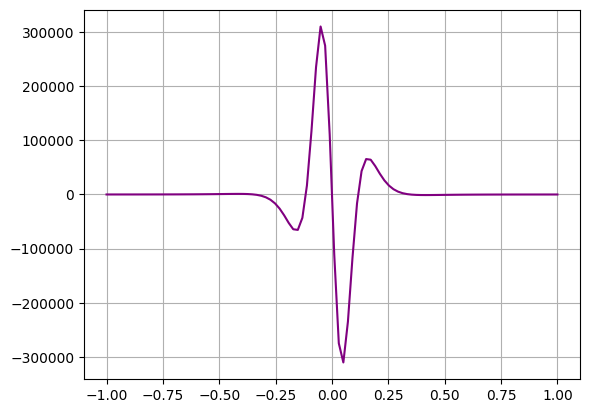

In [3]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import lagrange
f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) ,color ='purple')
plt.grid()
plt.show()

<ipython-input-4-d20000d6d0c6>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, P(xx),"k-",color='mediumblue',label=('Interpolacion de $N=4$'))


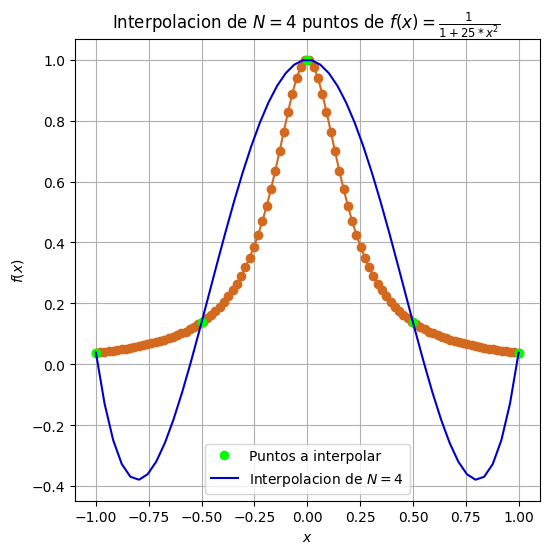

In [4]:
#Funcion
f_s = lambda x: 1/(1+25*x**2)
x=np.linspace(-1,1,100)

#Puntos a interpolar
N = 4
n=N+1
x_ = np.linspace(-1,1,n)

#Lagrange
P = lagrange(x_,f_s(x_))
xx=np.linspace(np.min(x_), np.max(x_))

#Grafica
plt.figure(figsize=(6,6))
plt.plot(x,f_s(x),"o-",color='chocolate')
plt.plot(x_,f_s(x_),"o",color='lime',label='Puntos a interpolar ')
#interpolación
plt.plot(xx, P(xx),"k-",color='mediumblue',label=('Interpolacion de $N=4$'))
#plt.plot(x_, P(x_),"k-")
plt.grid()
plt.title('Interpolacion de $N=4$ puntos de $f(x)=\\frac{1}{1+25*x^2}$ ')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()

In [5]:
def interpolation_lagrange(N):
  """
  N: numero de puntos 
  return: x y el polinomio de lagrange
  """
  #Puntos a interpolar  
  n=N+1
  x_ = np.linspace(-1,1,n)

  #Lagrange
  P = lagrange(x_,f_s(x_))
  xx=np.linspace(np.min(x_), np.max(x_))
  return xx, P,x_

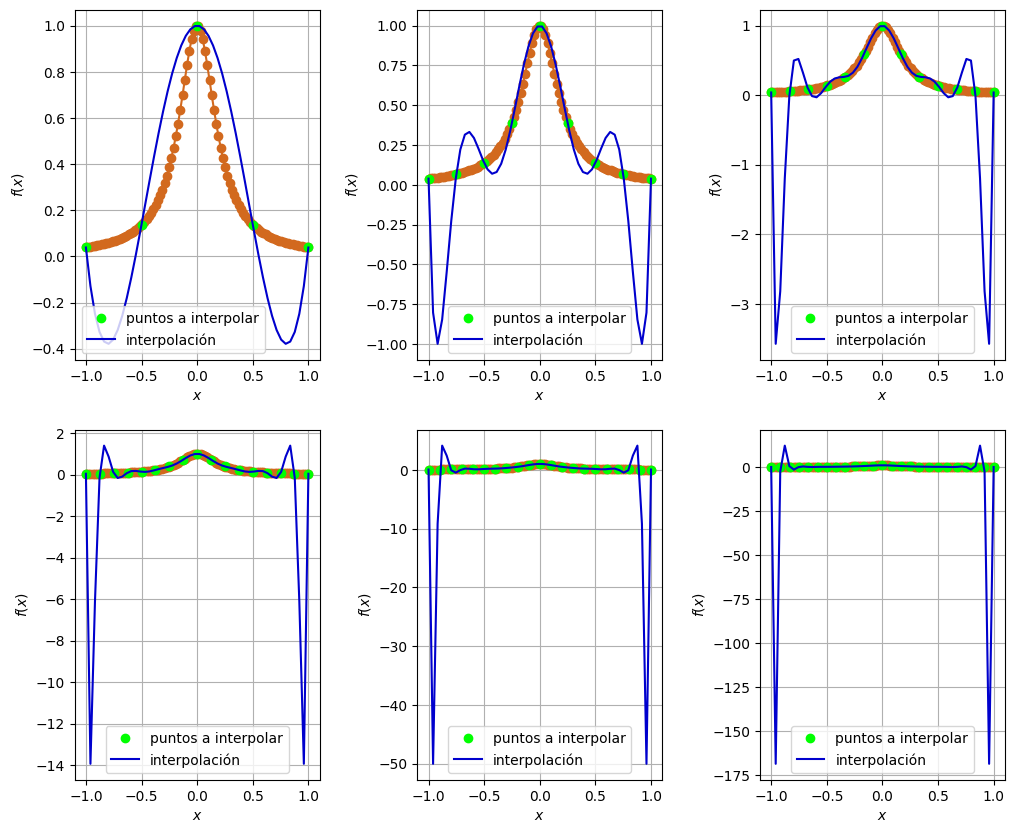

In [6]:
#Grafica

NN=[4, 8, 12, 16, 20,24]
i=0
fig, axs = plt.subplots(figsize=(12,10), nrows=2,ncols=3)
for n_ in NN:
  
  ax=axs.flatten()
  N = n_
  #se hace la interpolación 
  xx, P,x_ = interpolation_lagrange(N)
  #evaluando la funcion en x [-1,1,100]
  ax[i].plot(x,f_s(x),"o-",color='chocolate')
  #evaluando en el arreglo con intervalo (-1,1,n)
  ax[i].plot(x_,f_s(x_),"o",color='lime',label='puntos a interpolar')
  ax[i].plot(xx,P(xx),"-",color='mediumblue',label='interpolación')
  ax[i].set_xlabel("$x$")
  ax[i].set_ylabel("$f(x)$")
  ax[i].grid()
  ax[i].legend()
  i=i+1
 #Ajustes de espacios entre las gráficas 
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.2)


\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

In [7]:
N = 4
xx, P,x_ = interpolation_lagrange(N)

In [20]:
import math 
f_s = lambda x: 1/(1+25*x**2)
x = sp.symbols("x") # x será una variable simbólica
f5 = sp.diff(f_s(x),x, N+1)  

# la derivada está evaluada en x 
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion
x=np.linspace(-1,1,100)
fxn5max=np.max(fxn5(x))
c=1/math.factorial(N+1)


In [21]:
Error=np.zeros(len(x))
for u,i in enumerate(x):
    p=(i-x_[0])*(i-x_[1])*(i-x_[2])*(i-x_[3])*(i-x_[4])
    Error[u]=p*c*fxn5max

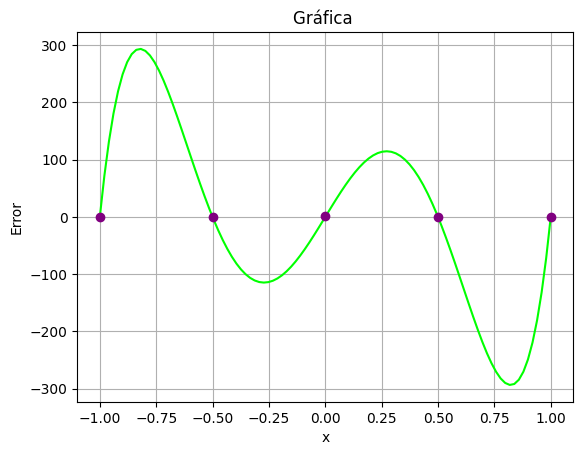

In [23]:
plt.plot(x,Error,color='lime')
plt.plot(x_,f_s(x_),"o",label="f(x)",color='purple')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Gráfica ')
plt.grid()

#3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


In [25]:
from scipy.interpolate import CubicHermiteSpline
#tiene como argumentos x,y,derivadas

In [26]:
x = sp.symbols("x") # x será una variable simbólica
f_s = lambda x: 1/(1+25*x**2)
fp=sp.diff(f_s(x),x, 1)
fder=sp.lambdify(x,f_s(x),'numpy')

In [27]:
def interpolation_Hermite(N):
  """
  N: numero de puntos 
  return: x y el polinomio de lagrange
  """
  #Puntos a interpolar  
  n=N+1
  x_ = np.linspace(-1,1,n)

  #Lagrange
  P = CubicHermiteSpline(x_,f_s(x_),fder(x_))
  xx=np.linspace(np.min(x_), np.max(x_))
  return xx, P,x_

In [28]:
f_s = lambda x: 1/(1+25*x**2)
x=np.linspace(-1,1,100)

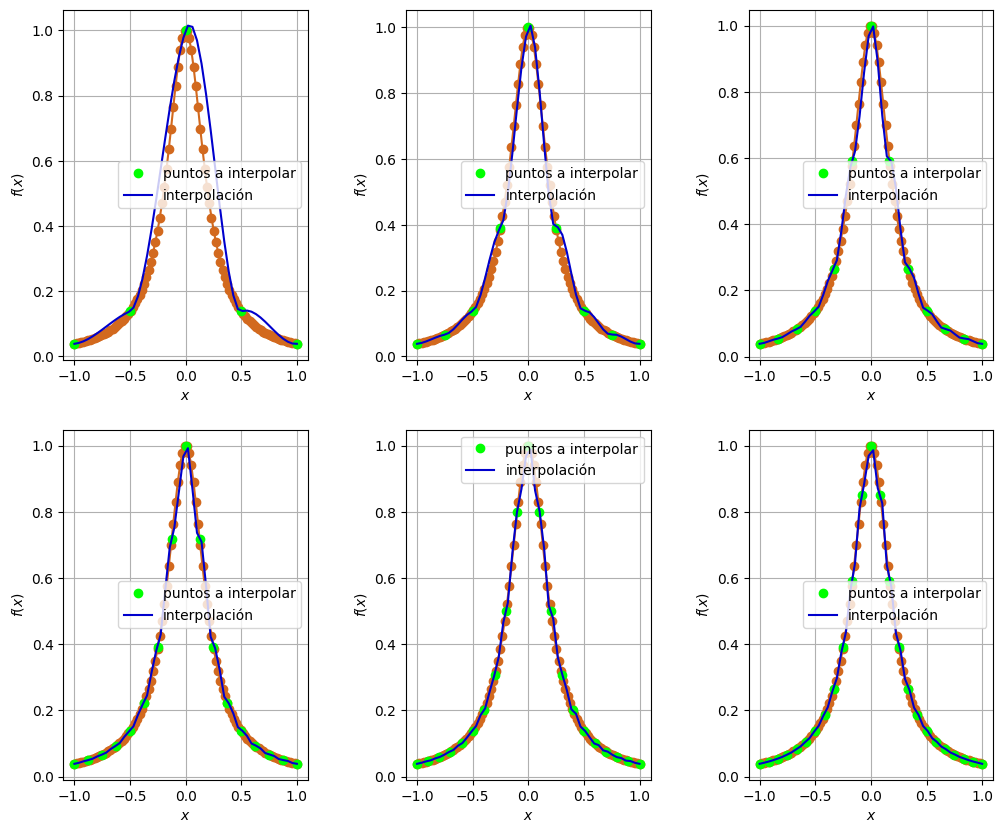

In [29]:
#Grafica

NN=[4, 8, 12, 16, 20,24]
i=0
fig, axs = plt.subplots(figsize=(12,10), nrows=2,ncols=3)
for n_ in NN:
  
  ax=axs.flatten()
  N = n_
  #se hace la interpolación 
  xx, P,x_ = interpolation_Hermite(N)
  #evaluando la funcion en x [-1,1,100]
  ax[i].plot(x,f_s(x),"o-",color='chocolate')
  #evaluando en el arreglo con intervalo (-1,1,n)
  ax[i].plot(x_,f_s(x_),"o",color='lime',label='puntos a interpolar')
  ax[i].plot(xx,P(xx),"-",color='mediumblue',label='interpolación')
  ax[i].set_xlabel("$x$")
  ax[i].set_ylabel("$f(x)$")
  ax[i].grid()
  ax[i].legend()
  #preguntar 
  i=i+1
 #Ajustes de espacios entre las gráficas 
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.2)

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$


Text(0, 0.5, 'y')

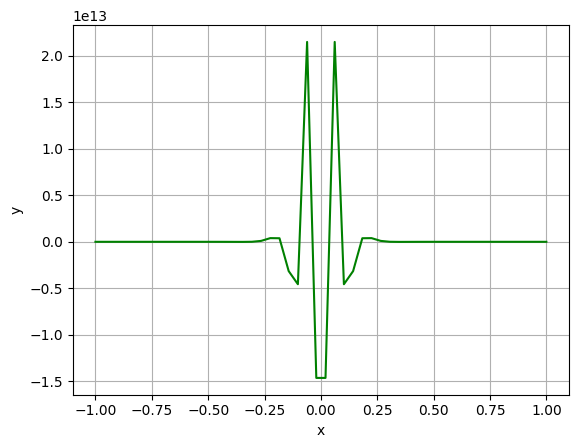

In [37]:
#Error 
f_s = lambda x: 1/(1+25*x**2)
x=sp.Symbol("x")
f_p = sp.diff(f_s(x), x, 10)
funP_Error = sp.lambdify(x,f_p,'numpy') #numpy funcion
plt.plot(xx,funP_Error(xx),color='green')
m=np.max(abs(funP_Error(xx)))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

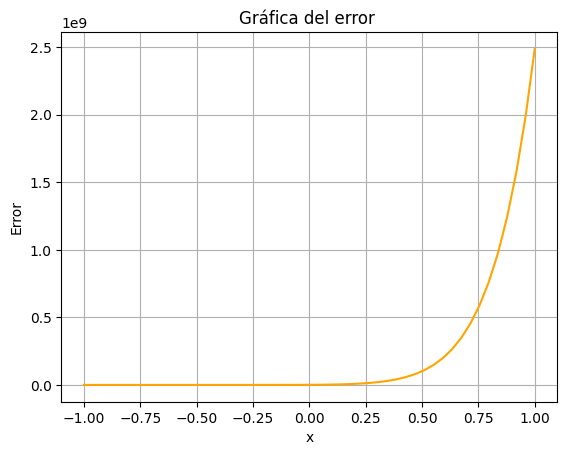

In [40]:
E=(m/(math.factorial(10)))*(xx-x_[0])**2*(xx-x_[1])**2*(xx-x_[2])**2*(xx-x_[3])**2*(xx-x_[4])**2
plt.plot(xx,E,color='orange')
plt.title('Gráfica del error ')
plt.xlabel('x')
plt.ylabel('Error')
plt.grid()


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [ ]:
1. #Representar gráficamente la imagen 
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pylab as plt
#Recuerde que debe modificar el enlace de google drive para leerlo 
#url="https://drive.google.com/uc?id=1aTgebG9A5zH4sjuRzXRtD0kAdgAkooD0"
url2="https://drive.google.com/uc?id=18Uu3TX_xLSl-Gs57r5OT97Vpk6xjB2zY"
#response = requests.get(url)
response=  requests.get(url2)
img = Image.open(BytesIO(response.content))


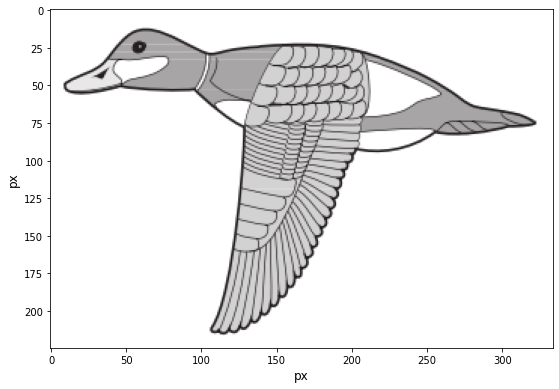

In [ ]:
ave = np.array(img)
plt.figure(figsize=(9,7))
plt.imshow(ave)
plt.xlabel('px',size=12)
plt.ylabel('px',size=12)
plt.show()

In [ ]:
2. #Puntos 𝑥𝑖 ,𝑦𝑖 de la paloma
x=np.array([0.9,1.3,1.9,2.1,2.6,3,3.9,4.4,4.7,5,6,7,8,9.2,10.5,11.3,11.6,12,12.6,13,13.3])
fx=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

Text(0.5, 1.0, 'Gráfico de los puntos $x_i$ y $y_i$')

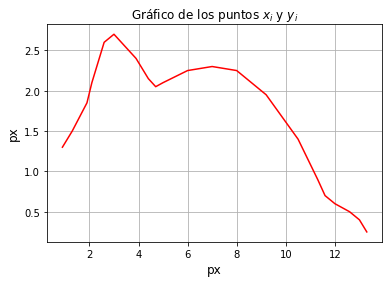

In [ ]:
#Gráfico de los puntos 
plt.plot(x,fx,color='red')
#plt.imshow(ave)
plt.xlabel('px',size=12)
plt.ylabel('px',size=12)
plt.grid()
plt.title("Gráfico de los puntos $x_i$ y $y_i$")

In [ ]:
3. #Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.
from scipy.interpolate import lagrange
La=lagrange(x,fx)

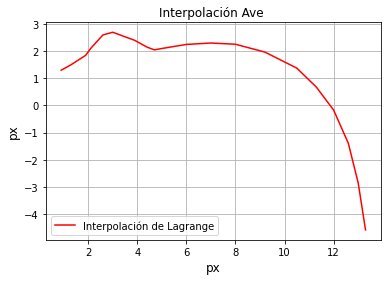

In [ ]:
#Visualizando la interoplación
plt.plot(x,La(x),label='Interpolación de Lagrange',color='r')
plt.xlabel('px',size=12)
plt.ylabel('px',size=12)
plt.title('Interpolación Ave ')
plt.grid()
plt.legend()
plt.show()

In [ ]:
4.#Repetir el proceso de interpolación mediante splines cúbico
from scipy.interpolate import CubicSpline
inCS=CubicSpline(x,fx)

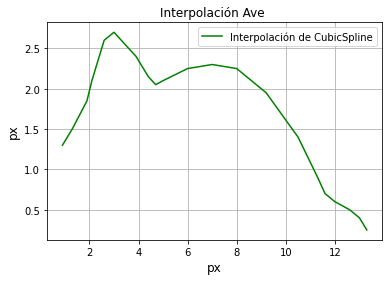

In [ ]:
#Gráfico de la interpolación
plt.plot(x,inCS(x),label='Interpolación de CubicSpline',color='g')
#plt.plot(x,fx,color='r')
plt.xlabel('px',size=12)
plt.ylabel('px',size=12)
plt.grid()
plt.legend()
plt.title('Interpolación Ave ')
plt.show()

In [ ]:
#Hallaré el error cuadrático medio para estimar cual fue el método de interpolacion más preciso 
#confirmar 
#para lagrange
diferencia = La(x) - fx
mse = np.mean(diferencia**2)
#para interpolación mediante splines cúbico
dif=inCS(x)-fx
mse1=np.mean(dif**2)
print("Los errores cuadráticos medios son para lagrange y cubicSplines respectivamente ",mse,mse1)

Los errores cuadráticos medios son para lagrange y cubicSplines respectivamente  1.8297516715384958 0.0


**Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?**

En la gráfica de interpolación por lagrange los puntos se extienden a un numero negativo en el eje $y$  ($y=-4$)  ,sin embargo los puntos $fx$  originales son mayores que cero, lo que sucede porque este método es suceptible a errores a medida que la cantidad de datos aumenta,por tanto aunque es el método base , en estos casos es mejor usar el CubicSplines.

# 5.0 Ejercicios de Repaso

 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.


e. Para los 100 puntos anteriores, emplee el metodo de interpolación de lagrange y cubic-spline. Realizar una gráfica mostrando los puntos y el polinomio de interpolación para cada unos de los metodos. ¿Que puede concluir de los metodos?

In [ ]:
import sympy  as sp
import numpy as np 
import scipy.optimize as opt
m=sp.symbols('m')
T=sp.symbols('T')
param=(0.5,) #se toma la temperatura como un parametro

In [ ]:
#Magnetización para una temperatura T
def func(m,T):
   return m-sp.tanh(m/T)

In [ ]:
1.#La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)
func1=sp.lambdify([m,T],func(m,T),"numpy")

In [ ]:
#Método de la secante
mag= opt.newton(func1,1.5,args=param,x1=0.25)
print(f'La magnetización en T=0.5 es m= {round(mag,4)} ')

La magnetización en T=0.5 es m= 0.9575 


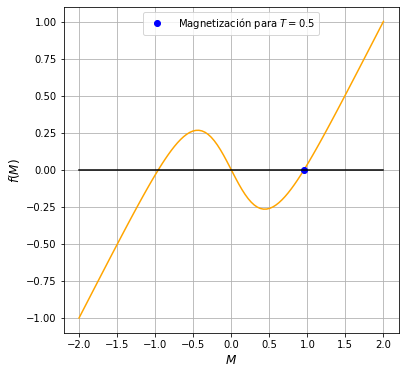

In [ ]:
#Previa inspeccion 
plt.figure(figsize=(6,6))
y=np.zeros(100)
#Se define un array M para visualizar donde se encuentra el cero de la func 
#y por tanto hallar la magnetización
M=np.linspace(-2,2,100)
plt.plot(M,func1(M,param),color='orange')
plt.plot(mag,func1(mag,param),'o',color='blue',label =' Magnetización para $T=0.5$')
plt.plot(M,y,color='k')
plt.xlabel('$M$',size=12)
plt.ylabel('$f(M)$',size=12)
plt.grid()
plt.legend(loc='upper center')

In [ ]:
2.  #Valide su respuestado con el metodo de punto fijo. (Muestre su resultado con 4 cifras)
def g(m,T):
  return m-func1(m,T)

In [ ]:
MaG=opt.fixed_point(g,2,args=param)
print(f'La magnetización en T=0.5 es {np.round(MaG,4)} ')

La magnetización en T=0.5 es 0.9575 


Por tanto se comprueba que la Magnetización en $T=0.5$ es de $0.9575$

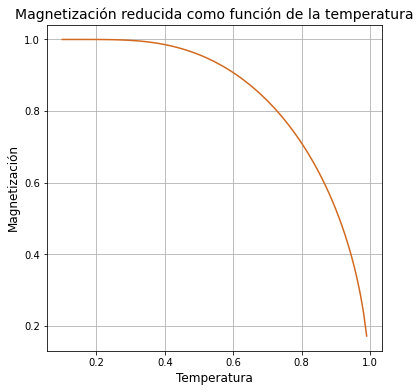

In [ ]:
3. #Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante 
#para construir un gráfico de magnetización reducida como función de la temperatura para 
#los 100 valores de T.
Ts = np.linspace(0.1,0.99,100)
MagR=np.zeros(len(Ts))

for u,i in enumerate(Ts):
  Param=(i,)
  #Método de la secante
  mag= opt.newton(func1,1,args=Param,x1=3)
  MagR[u]=mag

plt.figure(figsize=(6,6))
plt.plot(Ts,MagR,color='chocolate')
plt.title('Magnetización reducida como función de la temperatura',size=14)
plt.xlabel('Temperatura',size=12)
plt.ylabel('Magnetización',size=12)
plt.grid(True)


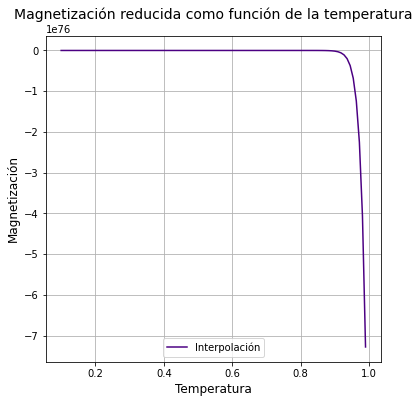

In [ ]:
4.  #Para los 100 puntos anteriores, emplee el metodo de interpolación de lagrange y cubic-spline. 
#Realizar una gráfica mostrando los puntos y el polinomio de interpolación para cada unos de los metodos. 
#¿Qué puede concluir de los metodos?
from scipy.interpolate import lagrange
P1=lagrange(Ts,MagR)
plt.figure(figsize=(6,6))
plt.xlabel('Temperatura',size=12)
plt.ylabel('Magnetización',size=12)
plt.title('Magnetización reducida como función de la temperatura',size=14)
plt.plot(Ts,P1(Ts),color= 'indigo',label='Interpolación')
plt.legend(loc='lower center')
plt.grid()

In [ ]:
# Mostrando los polinomios  en  markdown
from IPython.display import Markdown
respuesta = '''
El  Polinomio de interpolación para el método de
lagrange es  : 


{}   

'''.format(P1)

Markdown(respuesta)


El  Polinomio de interpolación para el método de
lagrange es  : 


          99             98            97             96             95
5.82e+61 x  - 3.102e+63 x  + 8.43e+64 x  - 1.452e+66 x  + 1.804e+67 x 
              94             93             92             91
 - 1.864e+68 x  + 1.592e+69 x  - 1.154e+70 x  + 7.001e+70 x 
              90             89            88             87
 - 3.748e+71 x  + 1.853e+72 x  - 7.83e+72 x  + 3.019e+73 x 
              86             85             84             83
 - 1.075e+74 x  + 3.491e+74 x  - 1.003e+75 x  + 2.787e+75 x 
              82            81             80             79
 - 7.221e+75 x  + 1.72e+76 x  - 3.857e+76 x  + 8.035e+76 x 
              78             77             76             75
 - 1.533e+77 x  + 2.786e+77 x  - 4.869e+77 x  + 7.907e+77 x 
              74             73             72             71
 - 1.241e+78 x  + 1.815e+78 x  - 2.484e+78 x  + 3.213e+78 x 
              70             69             68             67
 - 3.939e+78 x  + 4.736e+78 x  - 5.327e+78 x  + 5.646e+78 x 
              66             65             64             63
 - 5.814e+78 x  + 5.664e+78 x  - 5.419e+78 x  + 4.724e+78 x 
              62             61             60             59
 - 4.017e+78 x  + 3.211e+78 x  - 2.436e+78 x  + 1.803e+78 x 
             58             57             56             55
 - 1.26e+78 x  + 8.301e+77 x  - 5.372e+77 x  + 3.371e+77 x 
              54             53             52             51
 - 1.993e+77 x  + 1.117e+77 x  - 6.032e+76 x  + 3.191e+76 x 
              50             49             48             47
 - 1.566e+76 x  + 7.254e+75 x  - 3.344e+75 x  + 1.454e+75 x 
              46             45            44            43
 - 6.066e+74 x  + 2.341e+74 x  - 8.97e+73 x  + 3.27e+73 x 
              42             41             40            39
 - 1.156e+73 x  + 3.921e+72 x  - 1.288e+72 x  + 3.83e+71 x 
              38             37             36           35
 - 1.123e+71 x  + 3.142e+70 x  - 8.296e+69 x  + 2.1e+69 x 
              34            33             32             31
 - 5.065e+68 x  + 1.17e+68 x  - 2.559e+67 x  + 5.289e+66 x 
              30             29             28            27
 - 1.036e+66 x  + 1.919e+65 x  - 3.494e+64 x  + 5.93e+63 x 
              26             25             24             23
 - 9.512e+62 x  + 1.484e+62 x  - 2.123e+61 x  + 2.902e+60 x 
              22             21         20             19
 - 3.554e+59 x  + 4.312e+58 x  - 5e+57 x  + 5.283e+56 x 
              18             17             16             15
 - 5.266e+55 x  + 4.846e+54 x  - 4.239e+53 x  + 3.223e+52 x 
              14             13             12             11
 - 2.352e+51 x  + 1.499e+50 x  - 8.921e+48 x  + 5.126e+47 x 
              10             9             8             7
 - 2.487e+46 x  + 1.078e+45 x - 4.478e+43 x + 1.634e+42 x
              6             5             4             3             2
 - 5.056e+40 x + 1.189e+39 x - 2.454e+37 x + 3.891e+35 x - 4.624e+33 x + 3.475e+31 x - 1.542e+29   



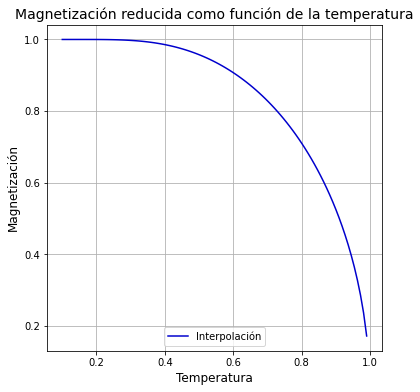

In [ ]:
from scipy.interpolate import CubicSpline
P2=CubicSpline(Ts,MagR)
plt.figure(figsize=(6,6))
plt.plot(Ts,P2(Ts),color='mediumblue',label='Interpolación')
plt.xlabel('Temperatura',size=12)
plt.ylabel('Magnetización',size=12)
plt.title('Magnetización reducida como función de la temperatura',size=14)
plt.legend(loc='lower center')
plt.grid()

In [ ]:
# Mostrando los polinomios  en  markdown
from IPython.display import Markdown
respuesta = '''
Los coeficientes  del Polinomio de interpolación para el método de
CubicSpline son :

{}   


'''.format(P2.c)

Markdown(respuesta)


Los coeficientes  del Polinomio de interpolación para el método de
CubicSpline son :

[[-1.58854785e-02 -1.58854785e-02 -4.18797230e-02 -7.96647748e-02
  -1.37485272e-01 -2.15174190e-01 -3.11874923e-01 -4.24113017e-01
  -5.47001262e-01 -6.74801423e-01 -8.01803390e-01 -9.22781604e-01
  -1.03349852e+00 -1.13082981e+00 -1.21281968e+00 -1.27857972e+00
  -1.32812715e+00 -1.36218801e+00 -1.38199861e+00 -1.38912386e+00
  -1.38530326e+00 -1.37232843e+00 -1.35195183e+00 -1.32582336e+00
  -1.29545049e+00 -1.26217692e+00 -1.22717536e+00 -1.19145036e+00
  -1.15584779e+00 -1.12106852e+00 -1.08768422e+00 -1.05615398e+00
  -1.02684033e+00 -1.00002557e+00 -9.75923617e-01 -9.54697364e-01
  -9.36463955e-01 -9.21310274e-01 -9.09298090e-01 -9.00473019e-01
  -8.94870448e-01 -8.92521199e-01 -8.93456266e-01 -8.97711025e-01
  -9.05328927e-01 -9.16364876e-01 -9.30888368e-01 -9.48986448e-01
  -9.70766859e-01 -9.96360623e-01 -1.02592619e+00 -1.05965170e+00
  -1.09776000e+00 -1.14051236e+00 -1.18821376e+00 -1.24121863e+00
  -1.29993773e+00 -1.36484607e+00 -1.43649241e+00 -1.51551050e+00
  -1.60263245e+00 -1.69870485e+00 -1.80470811e+00 -1.92177992e+00
  -2.05124352e+00 -2.19464330e+00 -2.35378527e+00 -2.53079414e+00
  -2.72817318e+00 -2.94889135e+00 -3.19648329e+00 -3.47518153e+00
  -3.79008325e+00 -4.14736592e+00 -4.55456730e+00 -5.02095315e+00
  -5.55800466e+00 -6.18007285e+00 -6.90526424e+00 -7.75666433e+00
  -8.76403525e+00 -9.96623222e+00 -1.14146724e+01 -1.31784595e+01
  -1.53519772e+01 -1.80668996e+01 -2.15098232e+01 -2.59558440e+01
  -3.18064146e+01 -3.97258528e+01 -5.06249562e+01 -6.66417696e+01
  -8.93004510e+01 -1.30249620e+02 -1.80181433e+02 -3.48337053e+02
  -4.13864511e+02 -1.77848124e+03 -1.77848124e+03]
 [ 1.31018222e-04 -2.97408320e-04 -7.25834862e-04 -1.85531830e-03
  -4.00385314e-03 -7.71178927e-03 -1.35149720e-02 -2.19261441e-02
  -3.33643437e-02 -4.81168019e-02 -6.63159918e-02 -8.79403863e-02
  -1.12827527e-01 -1.40700668e-01 -1.71198806e-01 -2.03908185e-01
  -2.38391093e-01 -2.74210280e-01 -3.10948077e-01 -3.48220161e-01
  -3.85684411e-01 -4.23045620e-01 -4.60056902e-01 -4.96518633e-01
  -5.32275687e-01 -5.67213594e-01 -6.01254123e-01 -6.34350671e-01
  -6.66483726e-01 -6.97656591e-01 -7.27891469e-01 -7.57225983e-01
  -7.85710135e-01 -8.13403708e-01 -8.40374095e-01 -8.66694459e-01
  -8.92442358e-01 -9.17698507e-01 -9.42545966e-01 -9.67069460e-01
  -9.91354944e-01 -1.01548933e+00 -1.03956036e+00 -1.06365660e+00
  -1.08786759e+00 -1.11228404e+00 -1.13699812e+00 -1.16210390e+00
  -1.18769778e+00 -1.21387907e+00 -1.24075061e+00 -1.26841953e+00
  -1.29699801e+00 -1.32660427e+00 -1.35736354e+00 -1.38940931e+00
  -1.42288460e+00 -1.45794352e+00 -1.49475301e+00 -1.53349477e+00
  -1.57436763e+00 -1.61759014e+00 -1.66340370e+00 -1.71207613e+00
  -1.76390595e+00 -1.81922737e+00 -1.87841623e+00 -1.94189711e+00
  -2.01015186e+00 -2.08372986e+00 -2.16326057e+00 -2.24946875e+00
  -2.34319335e+00 -2.44541074e+00 -2.55726395e+00 -2.68009925e+00
  -2.81551283e+00 -2.96541053e+00 -3.13208522e+00 -3.31831811e+00
  -3.52751299e+00 -3.76387637e+00 -4.03266263e+00 -4.34051289e+00
  -4.69593195e+00 -5.10997012e+00 -5.59722893e+00 -6.17734234e+00
  -6.87736359e+00 -7.73517296e+00 -8.80656717e+00 -1.01719069e+01
  -1.19692152e+01 -1.43776213e+01 -1.78904141e+01 -2.27498528e+01
  -3.21443975e+01 -4.33061980e+01 -9.12712982e+01]
 [-1.82233547e-06 -3.31816565e-06 -1.25170185e-05 -3.57213247e-05
  -8.83946841e-05 -1.93717126e-04 -3.84543565e-04 -7.03155619e-04
  -1.20021152e-03 -1.93271879e-03 -2.96145804e-03 -4.34820730e-03
  -6.15309056e-03 -8.43228342e-03 -1.12362282e-02 -1.46084021e-02
  -1.85846280e-02 -2.31928625e-02 -2.84533771e-02 -3.43792329e-02
  -4.09769609e-02 -4.82473622e-02 -5.61863647e-02 -6.47858821e-02
  -7.40346391e-02 -8.39189367e-02 -9.44233435e-02 -1.05531306e-01
  -1.17225676e-01 -1.29489159e-01 -1.42304692e-01 -1.55655748e-01
  -1.69526588e-01 -1.83902460e-01 -1.98769755e-01 -2.14116129e-01
  -2.29930592e-01 -2.46203575e-01 -2.62926985e-01 -2.80094235e-01
  -2.97700272e-01 -3.15741600e-01 -3.34216289e-01 -3.53123997e-01
  -3.72465982e-01 -3.92245123e-01 -4.12465942e-01 -4.33134637e-01
  -4.54259117e-01 -4.75849050e-01 -4.97915923e-01 -5.20473109e-01
  -5.43535954e-01 -5.67121873e-01 -5.91250473e-01 -6.15943683e-01
  -6.41225921e-01 -6.67124275e-01 -6.93668719e-01 -7.20892360e-01
  -7.48831729e-01 -7.77527107e-01 -8.07022911e-01 -8.37368133e-01
  -8.68616861e-01 -9.00828868e-01 -9.34070310e-01 -9.68414541e-01
  -1.00394306e+00 -1.04074665e+00 -1.07892666e+00 -1.11859665e+00
  -1.15988422e+00 -1.20293329e+00 -1.24790683e+00 -1.29499019e+00
  -1.34439519e+00 -1.39636511e+00 -1.45118098e+00 -1.50916945e+00
  -1.57071278e+00 -1.63626164e+00 -1.70635173e+00 -1.78162574e+00
  -1.86286246e+00 -1.95101653e+00 -2.04727317e+00 -2.15312538e+00
  -2.27048586e+00 -2.40185109e+00 -2.55055966e+00 -2.72117423e+00
  -2.92022068e+00 -3.15707608e+00 -3.44716246e+00 -3.81251435e+00
  -4.30600812e+00 -4.98430135e+00 -6.19413945e+00]
 [ 9.99999996e-01  9.99999979e-01  9.99999913e-01  9.99999712e-01
   9.99999183e-01  9.99997964e-01  9.99995443e-01  9.99990667e-01
   9.99982266e-01  9.99968382e-01  9.99946628e-01  9.99914063e-01
   9.99867196e-01  9.99802010e-01  9.99714012e-01  9.99598283e-01
   9.99449546e-01  9.99262241e-01  9.99030588e-01  9.98748661e-01
   9.98410443e-01  9.98009888e-01  9.97540962e-01  9.96997689e-01
   9.96374179e-01  9.95664657e-01  9.94863476e-01  9.93965135e-01
   9.92964287e-01  9.91855736e-01  9.90634444e-01  9.89295522e-01
   9.87834227e-01  9.86245954e-01  9.84526225e-01  9.82670679e-01
   9.80675058e-01  9.78535199e-01  9.76247018e-01  9.73806495e-01
   9.71209665e-01  9.68452600e-01  9.65531396e-01  9.62442161e-01
   9.59180997e-01  9.55743988e-01  9.52127185e-01  9.48326591e-01
   9.44338146e-01  9.40157709e-01  9.35781047e-01  9.31203812e-01
   9.26421530e-01  9.21429578e-01  9.16223168e-01  9.10797322e-01
   9.05146859e-01  8.99266364e-01  8.93150164e-01  8.86792305e-01
   8.80186520e-01  8.73326196e-01  8.66204341e-01  8.58813542e-01
   8.51145924e-01  8.43193100e-01  8.34946118e-01  8.26395399e-01
   8.17530671e-01  8.08340885e-01  7.98814132e-01  7.88937537e-01
   7.78697143e-01  7.68077774e-01  7.57062878e-01  7.45634339e-01
   7.33772259e-01  7.21454699e-01  7.08657368e-01  6.95353251e-01
   6.81512154e-01  6.67100150e-01  6.52078892e-01  6.36404756e-01
   6.20027753e-01  6.02890136e-01  5.84924589e-01  5.66051824e-01
   5.46177344e-01  5.25186980e-01  5.02940575e-01  4.79262788e-01
   4.53929212e-01  4.26644511e-01  3.97006108e-01  3.64439683e-01
   3.28073876e-01  2.86464751e-01  2.36864300e-01]]   





**¿Qué puede concluir de los metodos?**

Se puede concluir que el método de lagrange es menos efectivo en grandes conjuntos de datos (como es posible ver en la gráfica ) ya que el error  aumenta proporcionalmente a la cantidad de estos ,en su lugar el segundo método aplicado (CubicSplines) se basa en una técnica de suavizado de curvas que  proporciona una interpolación más estable y precisa ( así  aumenten los datos ).